In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.utils import shuffle
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def show_images(path):
    labels = list(os.listdir(path))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    random_indices = random.sample(range(1, 101), 10)

    for i, idx in enumerate(random_indices, 1):
        file_path = os.path.join(path, labels[idx])
        image = Image.open(file_path)
        subplot_row = (i - 1) // 5
        subplot_col = (i - 1) % 5
        axes[subplot_row, subplot_col].imshow(image)
        axes[subplot_row, subplot_col].axis('off')
    plt.tight_layout()
    plt.show()


def read_data(path, image_size, classes):
    X = []
    y = []
    gamma = 1.8
    labels = os.listdir(path)
    for label in labels:
        try:
            for image in os.listdir(path + '/' + label):
                img = cv2.imread(path + '/' + label + '/' + image)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img, (image_size, image_size))
                X.append(img)
                y.append(classes[label])
        except:
            pass
    return np.array(X), np.array(y)

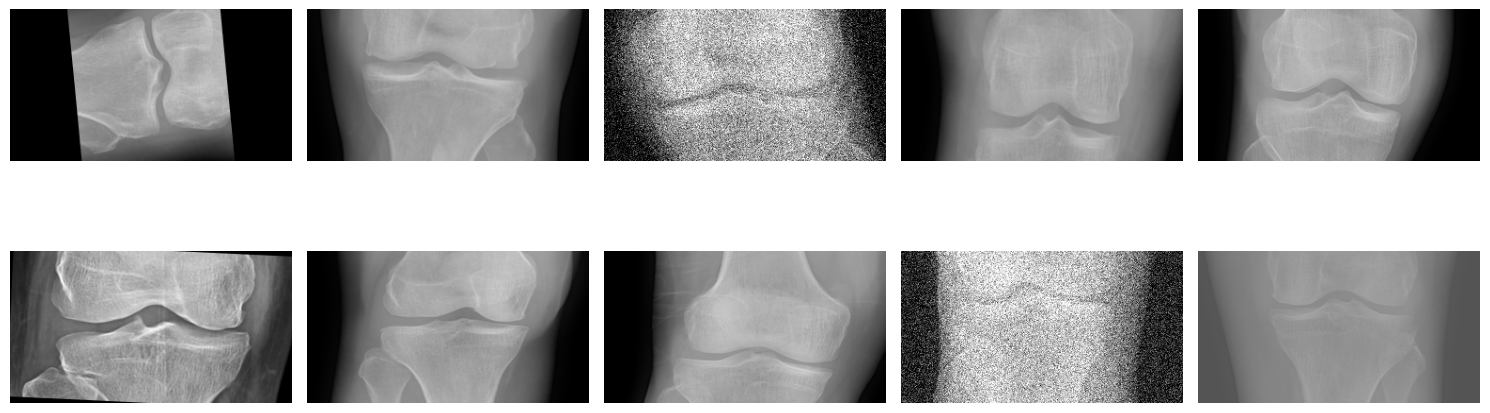

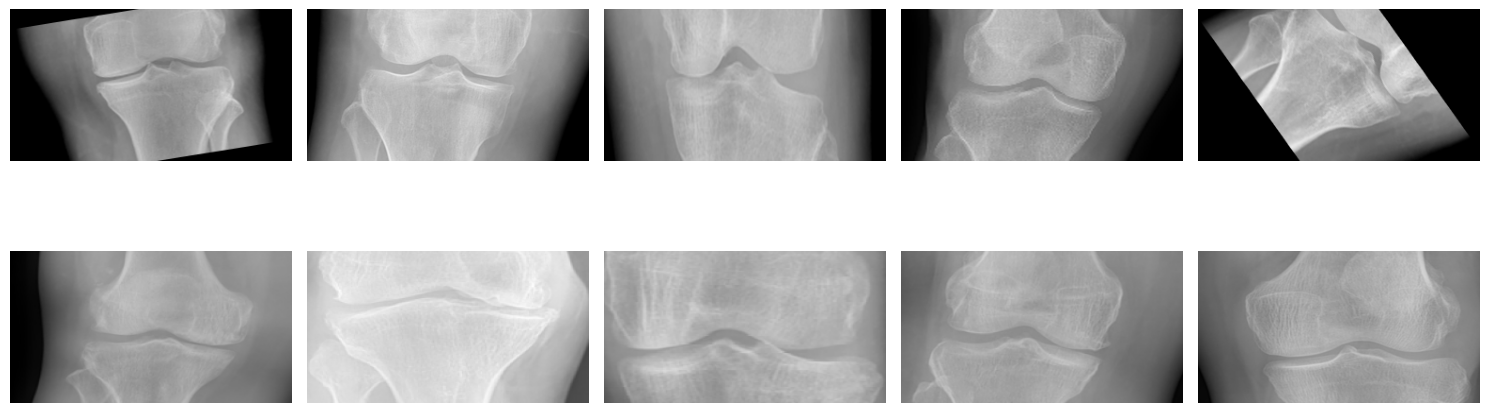

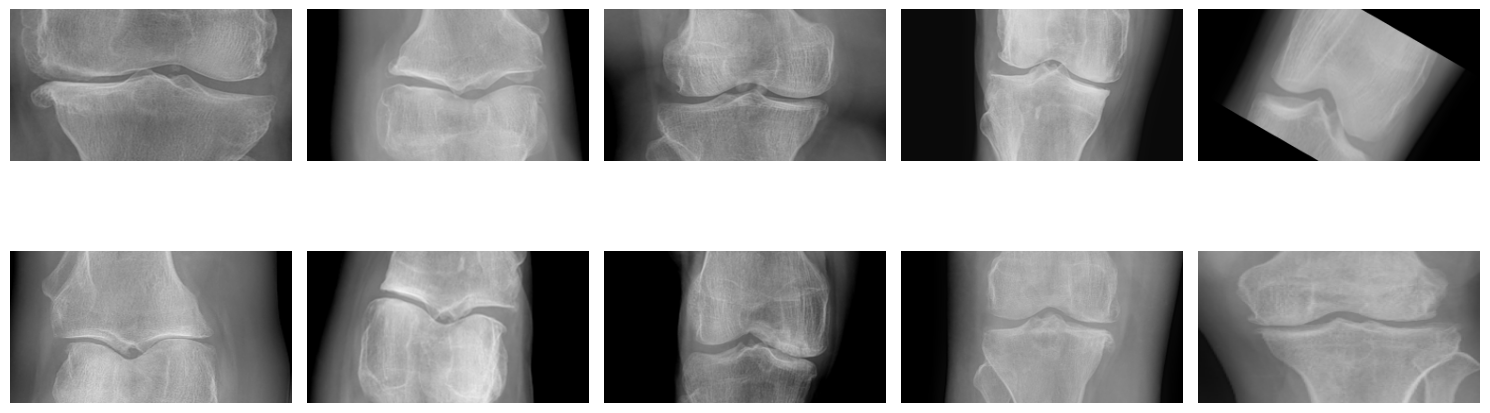

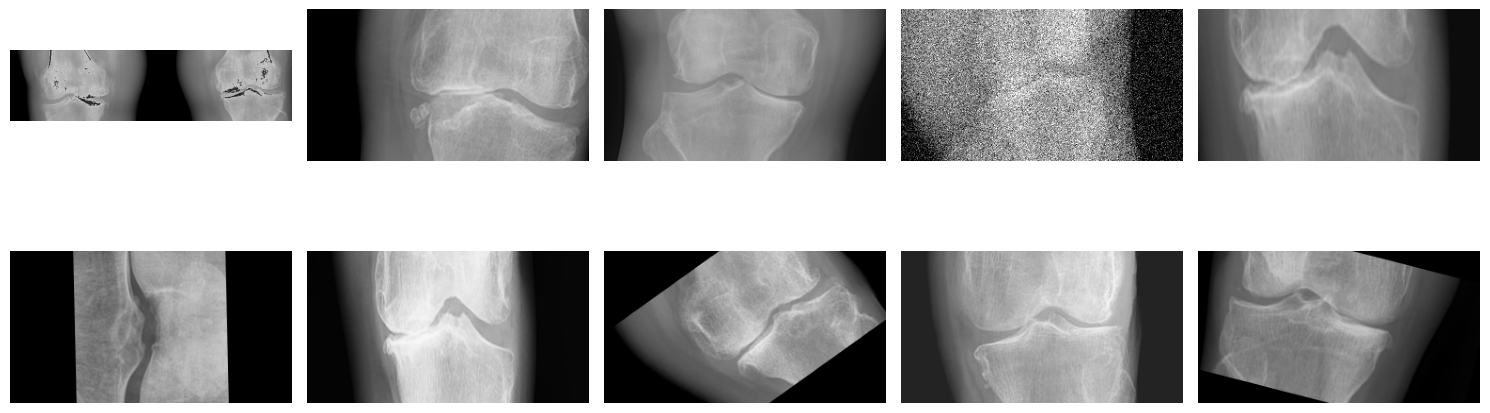

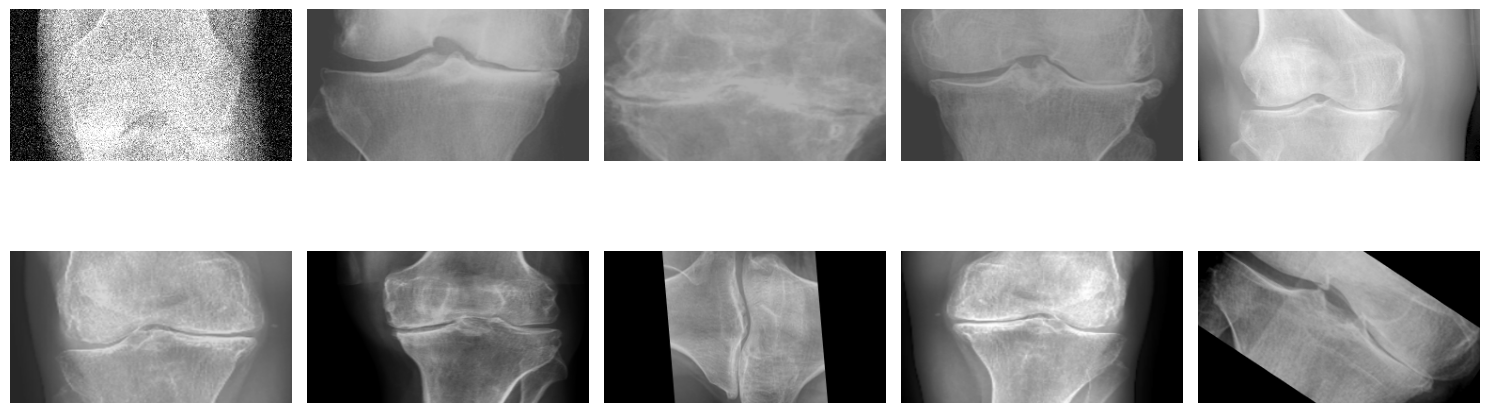

In [6]:
show_images(pathTrain+'/0')
show_images(pathTrain+'/1')
show_images(pathTrain+'/2')
show_images(pathTrain+'/3')
show_images(pathTrain+'/4')

In [10]:
pathTrain='/Data/TrainAug'
# Adjusted class labels to start from 0
knee2_classes = {'0Normal':0, '1Doubtful':1, '2Mild':2, '3Moderate':3, '4Severe':4}

x_traindig_knee, y_traindig_knee = read_data(pathTrain, 200, knee2_classes)
x_testdig_knee, y_testdig_knee = read_data(pathTrain, 200, knee2_classes)

# x_traindig_knee, y_traindig_knee = shuffle(x_traindig_knee, y_traindig_knee, random_state=42)
# x_testdig_knee, y_testdig_knee = shuffle(x_testdig_knee, y_testdig_knee, random_state=42)

x_knee = np.concatenate((x_traindig_knee, x_testdig_knee))
x_knee.shape
y_knee = np.concatenate((y_traindig_knee, y_testdig_knee))
y_knee.shape

x_train, x_test, y_train, y_test = train_test_split(x_knee, y_knee, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

x_train = x_train / 255
x_test = x_test / 255

print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

ValueError: Found input variables with inconsistent numbers of samples: [10, 0]

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))

# Adjusted the number of units to match the number of classes (5)
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x=x_train, y=y_train, epochs=150, validation_data=(x_test, y_test))
model.save(pathTrain+'knee.h5')

In [16]:

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# # fix random seed for reproducibility
# numpy.random.seed(7)
# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
# model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
# scores = model.evaluate(X, Y)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [20]:
# !pip3 install ann_visualizer
# !pip install graphviz
# !pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-10673 "(null)" UserInfo={_LSLine=4101, _LSFunction=_LSOpenStuffCallLocal}


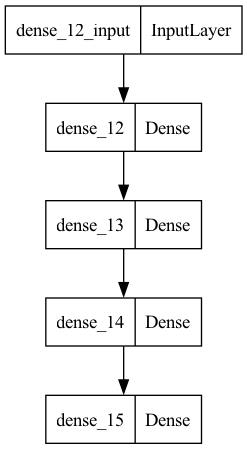

In [19]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [21]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

TensorFlow version:  2.9.0
